### Read cryo DAT files and exports to a single TXT file for Tellier analysis

In [22]:
import pandas as pd
import numpy as np
from decimal import Decimal
from tkinter import *
from tkinter import filedialog

In [23]:
'''
read SAMPLE INFORMATION AND DEMAG DATA from binary DAT file from magnetometer (format of 2G-Barcelona)
'''
def readDATfile(filename):                    
    with open(filename, 'r') as f:
        data = f.read()
        sample={}
        sample["name"]= data[15:24].rstrip('\x00')                #sample name
        sample["vol"]= float(data[24:29].strip().strip('\x00'))   #sample volume
        sample["comment"] = data[30:57].strip().strip('\x00')
        sample["CoreAz"] = float(data[111:114].lstrip('0').strip('\x00'))       # in- CoreAzimut
        sample["CoreInc"] = float(data[114:118].strip().strip('\x00'))      #az - CoreInc
        sample["BedAz"] = float(data[118:123].strip('\x00'))                #str - Bed dip directiom
        sample["BedInc"] = float(data[123:127].strip('\x00'))               #dip - Bed inclination
        sample["mag_Dec"] = float(data[142:147].strip('\x00'))
        sample["com"] = 50                                      #50 microTesla

        sample_demag=[]
        measurement = {}
        for n in range(len(data)):
            if data[n]=="Í":
                line = n+1
                step = data[line:line+4].strip().strip('\x00')
                treatment = data[line+4:line+5].strip().strip('\x00')
                X = float(data[line+65:line+76].strip().strip('\x00'))/ sample["vol"] * 1e+09     # e-6 A/m  
                Y = float(data[line+97:line+108].strip().strip('\x00'))/ sample["vol"] * 1e+09    # e-6 A/m
                Z = float(data[line+129:line+140].strip().strip('\x00'))/ sample["vol"] * 1e+09   # e-6 A/m
                Intensity = np.sqrt(X**2 + Y**2 + Z**2)
                measurement ={"step":step,"treat":treatment,
                          "X":X,"Y":Y,"Z":Z, "Int (e-6A/m)":Intensity}
                sample_demag.append(measurement)
    return(sample,sample_demag)

In [24]:
def makedataframe(sample_demag):
    pd_sample_demag = pd.DataFrame(sample_demag)
    for n in range(len(pd_sample_demag)):
        if pd_sample_demag.loc[n,'step']=='NRM':
            pd_sample_demag.loc[n,'step']= 20
        else:
            pass
    pd_sample_demag['step'] = pd.to_numeric(pd_sample_demag.step, errors='coerce')
    return(pd_sample_demag)

### Selecting a collection of files

In [25]:
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
root.title("select first set of files")
filenames = filedialog.askopenfilenames(filetypes = (('binary DAT','typeName {DAT}')))
filenames

('C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag038-1b.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag039-2a.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag040-1b.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag041-1b.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag042-1a.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag043-1b.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag044-1b.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/boltaña/boltaña_mgnt/demag_DAT/aguilar/ag045-2a.dat',
 'C:/Users/Miguel/OneDrive - Universitat de Barcelona/projects/b

C:\Users\Miguel\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


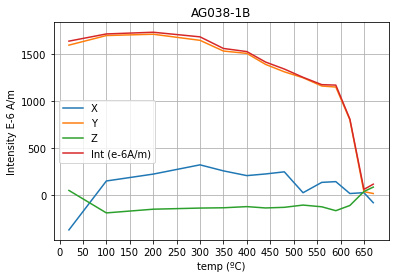

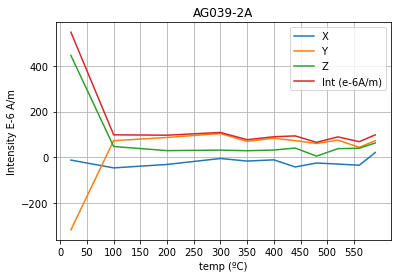

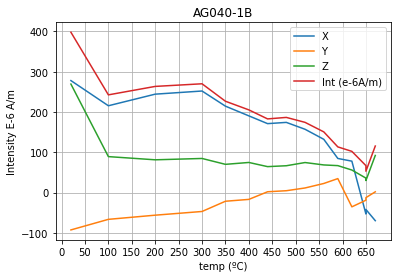

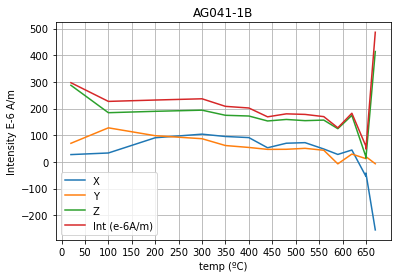

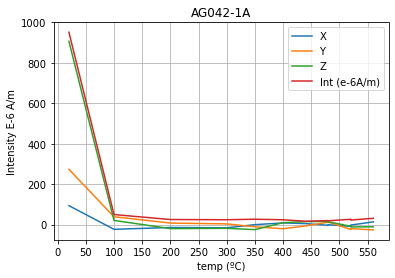

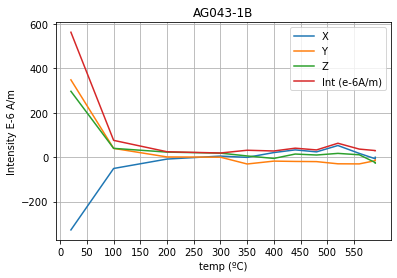

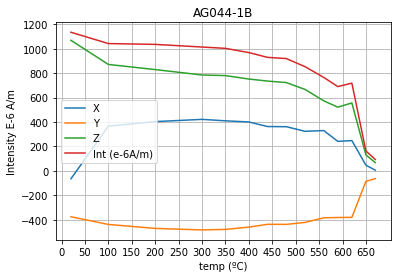

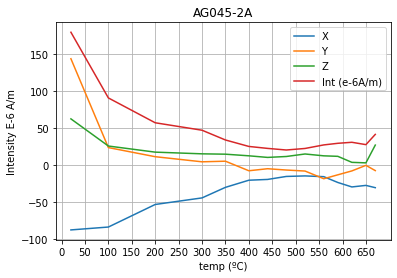

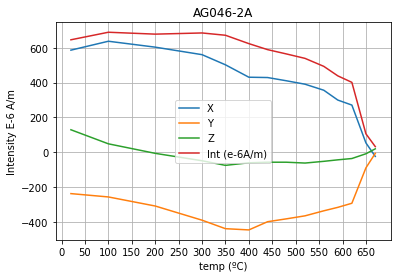

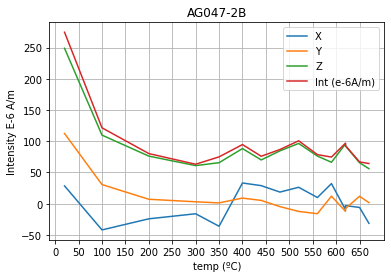

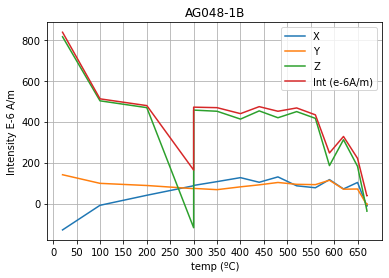

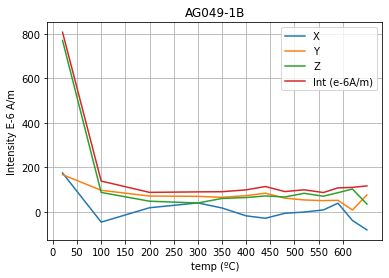

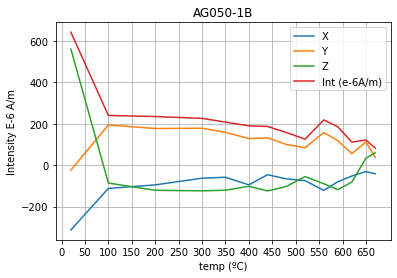

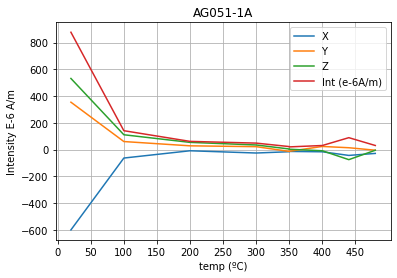

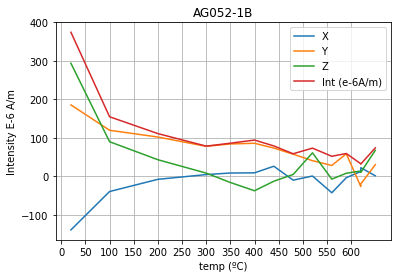

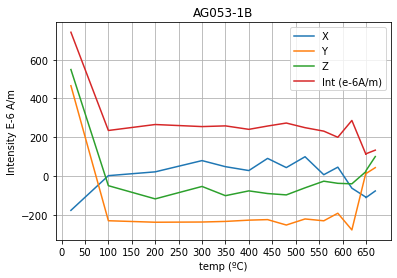

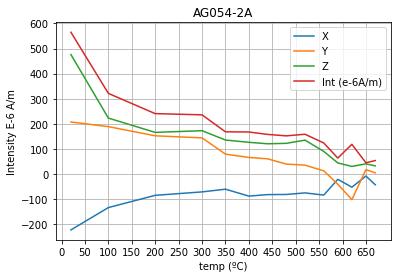

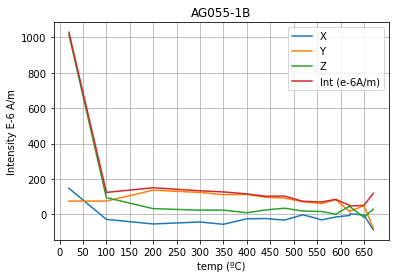

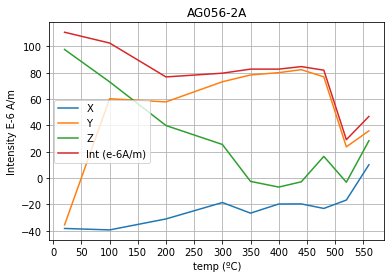

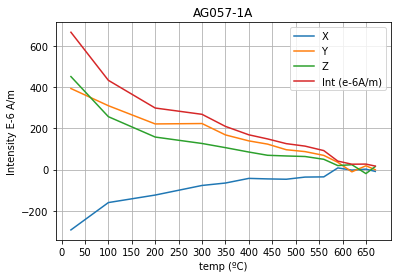

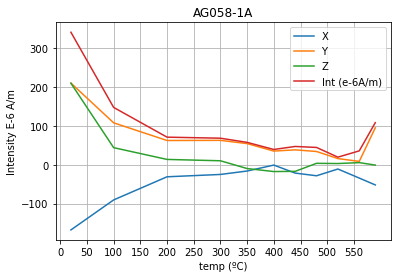

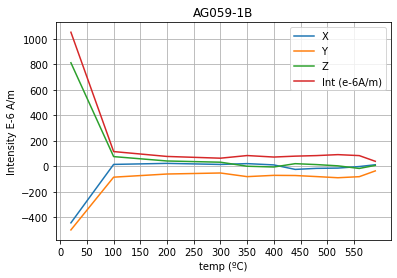

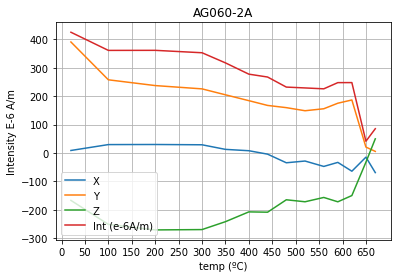

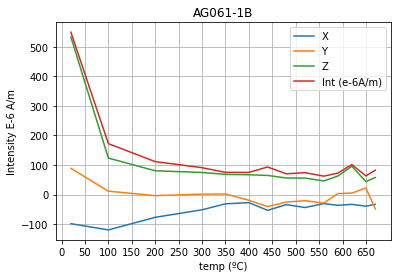

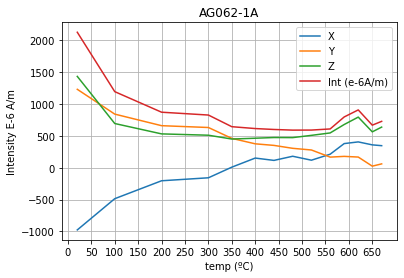

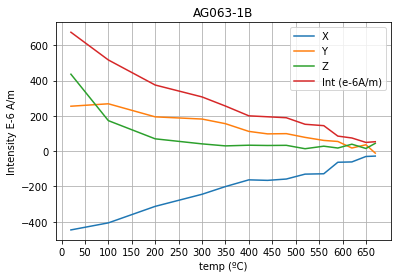

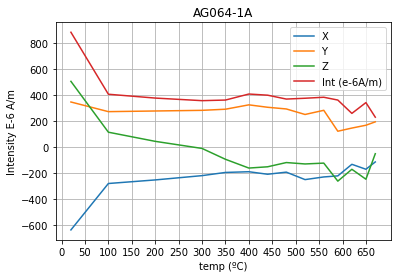

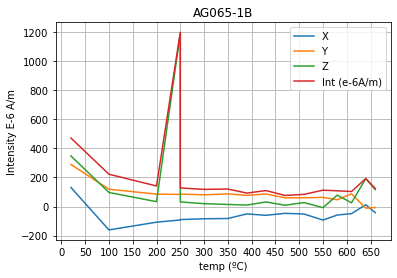

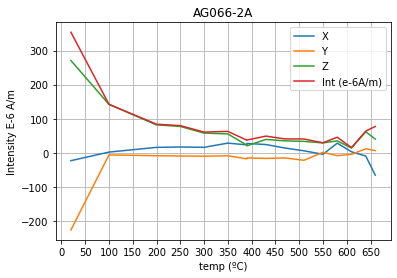

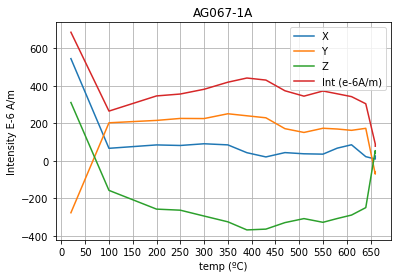

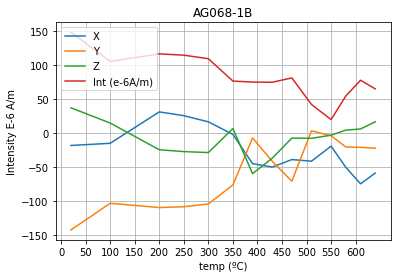

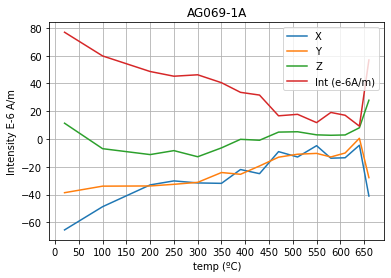

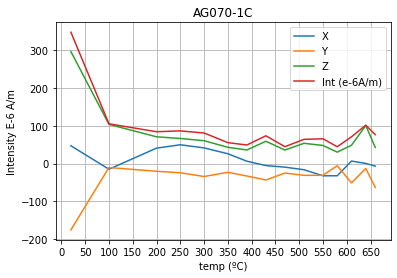

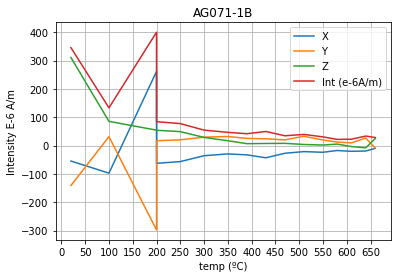

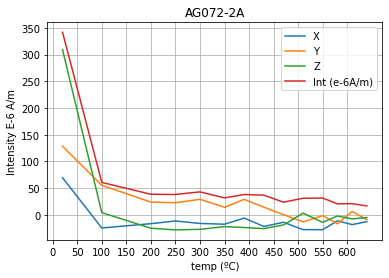

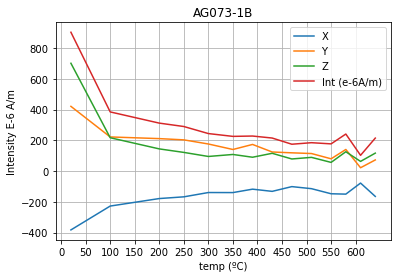

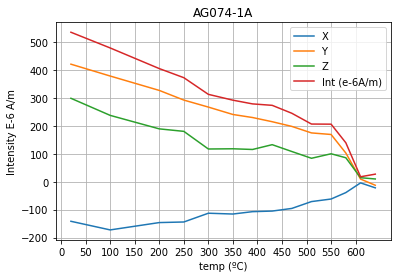

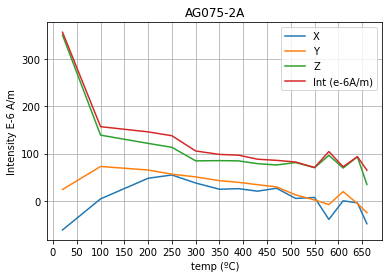

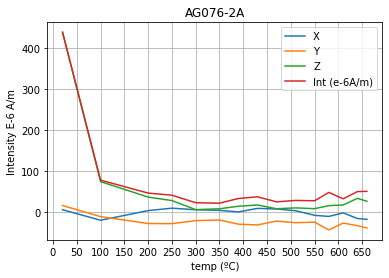

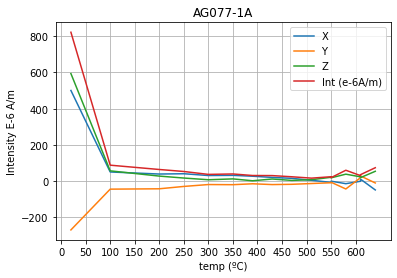

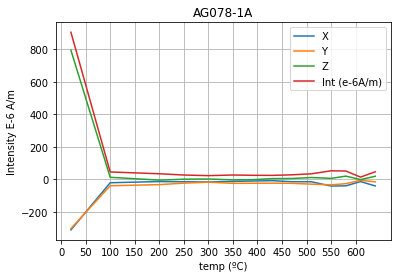

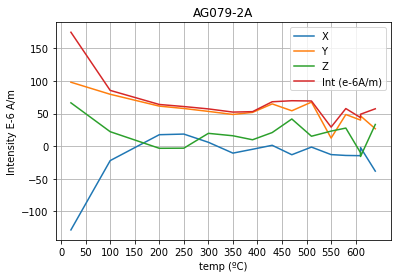

In [32]:
sample_coll = []
for file in range(len(filenames)):
    sample,sample_demag=readDATfile(filenames[file])
    summary = (sample,sample_demag)
    sample_coll.append(summary)
    pd_sample_demag = makedataframe(sample_demag)
    pd_sample_demag.plot(x="step", grid=True, xticks=range(0,pd_sample_demag['step'].max(),50),
                  title= sample['name'], xlabel= "temp (ºC)", ylabel = "Intensity E-6 A/m")

In [29]:
sample_coll[0][0]

{'name': 'AG038-1B',
 'vol': 10.0,
 'comment': 'Mar 11 2019 12:24',
 'CoreAz': 116.0,
 'CoreInc': 12.0,
 'BedAz': 234.0,
 'BedInc': 27.0,
 'mag_Dec': 0.33,
 'com': 50}

In [30]:
#UNMARK TO PRINT THE LIST OF BYTES

# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(filetypes = (('binary DAT','typeName {DAT}')))
 

try:
    with open(filename, "rb") as f:
        byte = f.read(1)
        sum_bytes = np.array(byte)
        n=1
        while byte:
            # Do stuff with byte.
            byte = f.read(1)
            sum_bytes = np.append(sum_bytes, byte)
            print(n, byte)
            n += 1
except IOError:
     print('Error While Opening the file!')


Error While Opening the file!
